In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer

In [215]:
df = pd.read_csv("stroke_data.csv")

In [216]:
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,NaN,NaN,Yes,Private,Urban,228.69,36.6,NaN,1
1,1,51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       4380 non-null   float64
 5   heart_disease      4716 non-null   float64
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     4599 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 519.1+ KB


In [218]:
df.isna().sum()

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

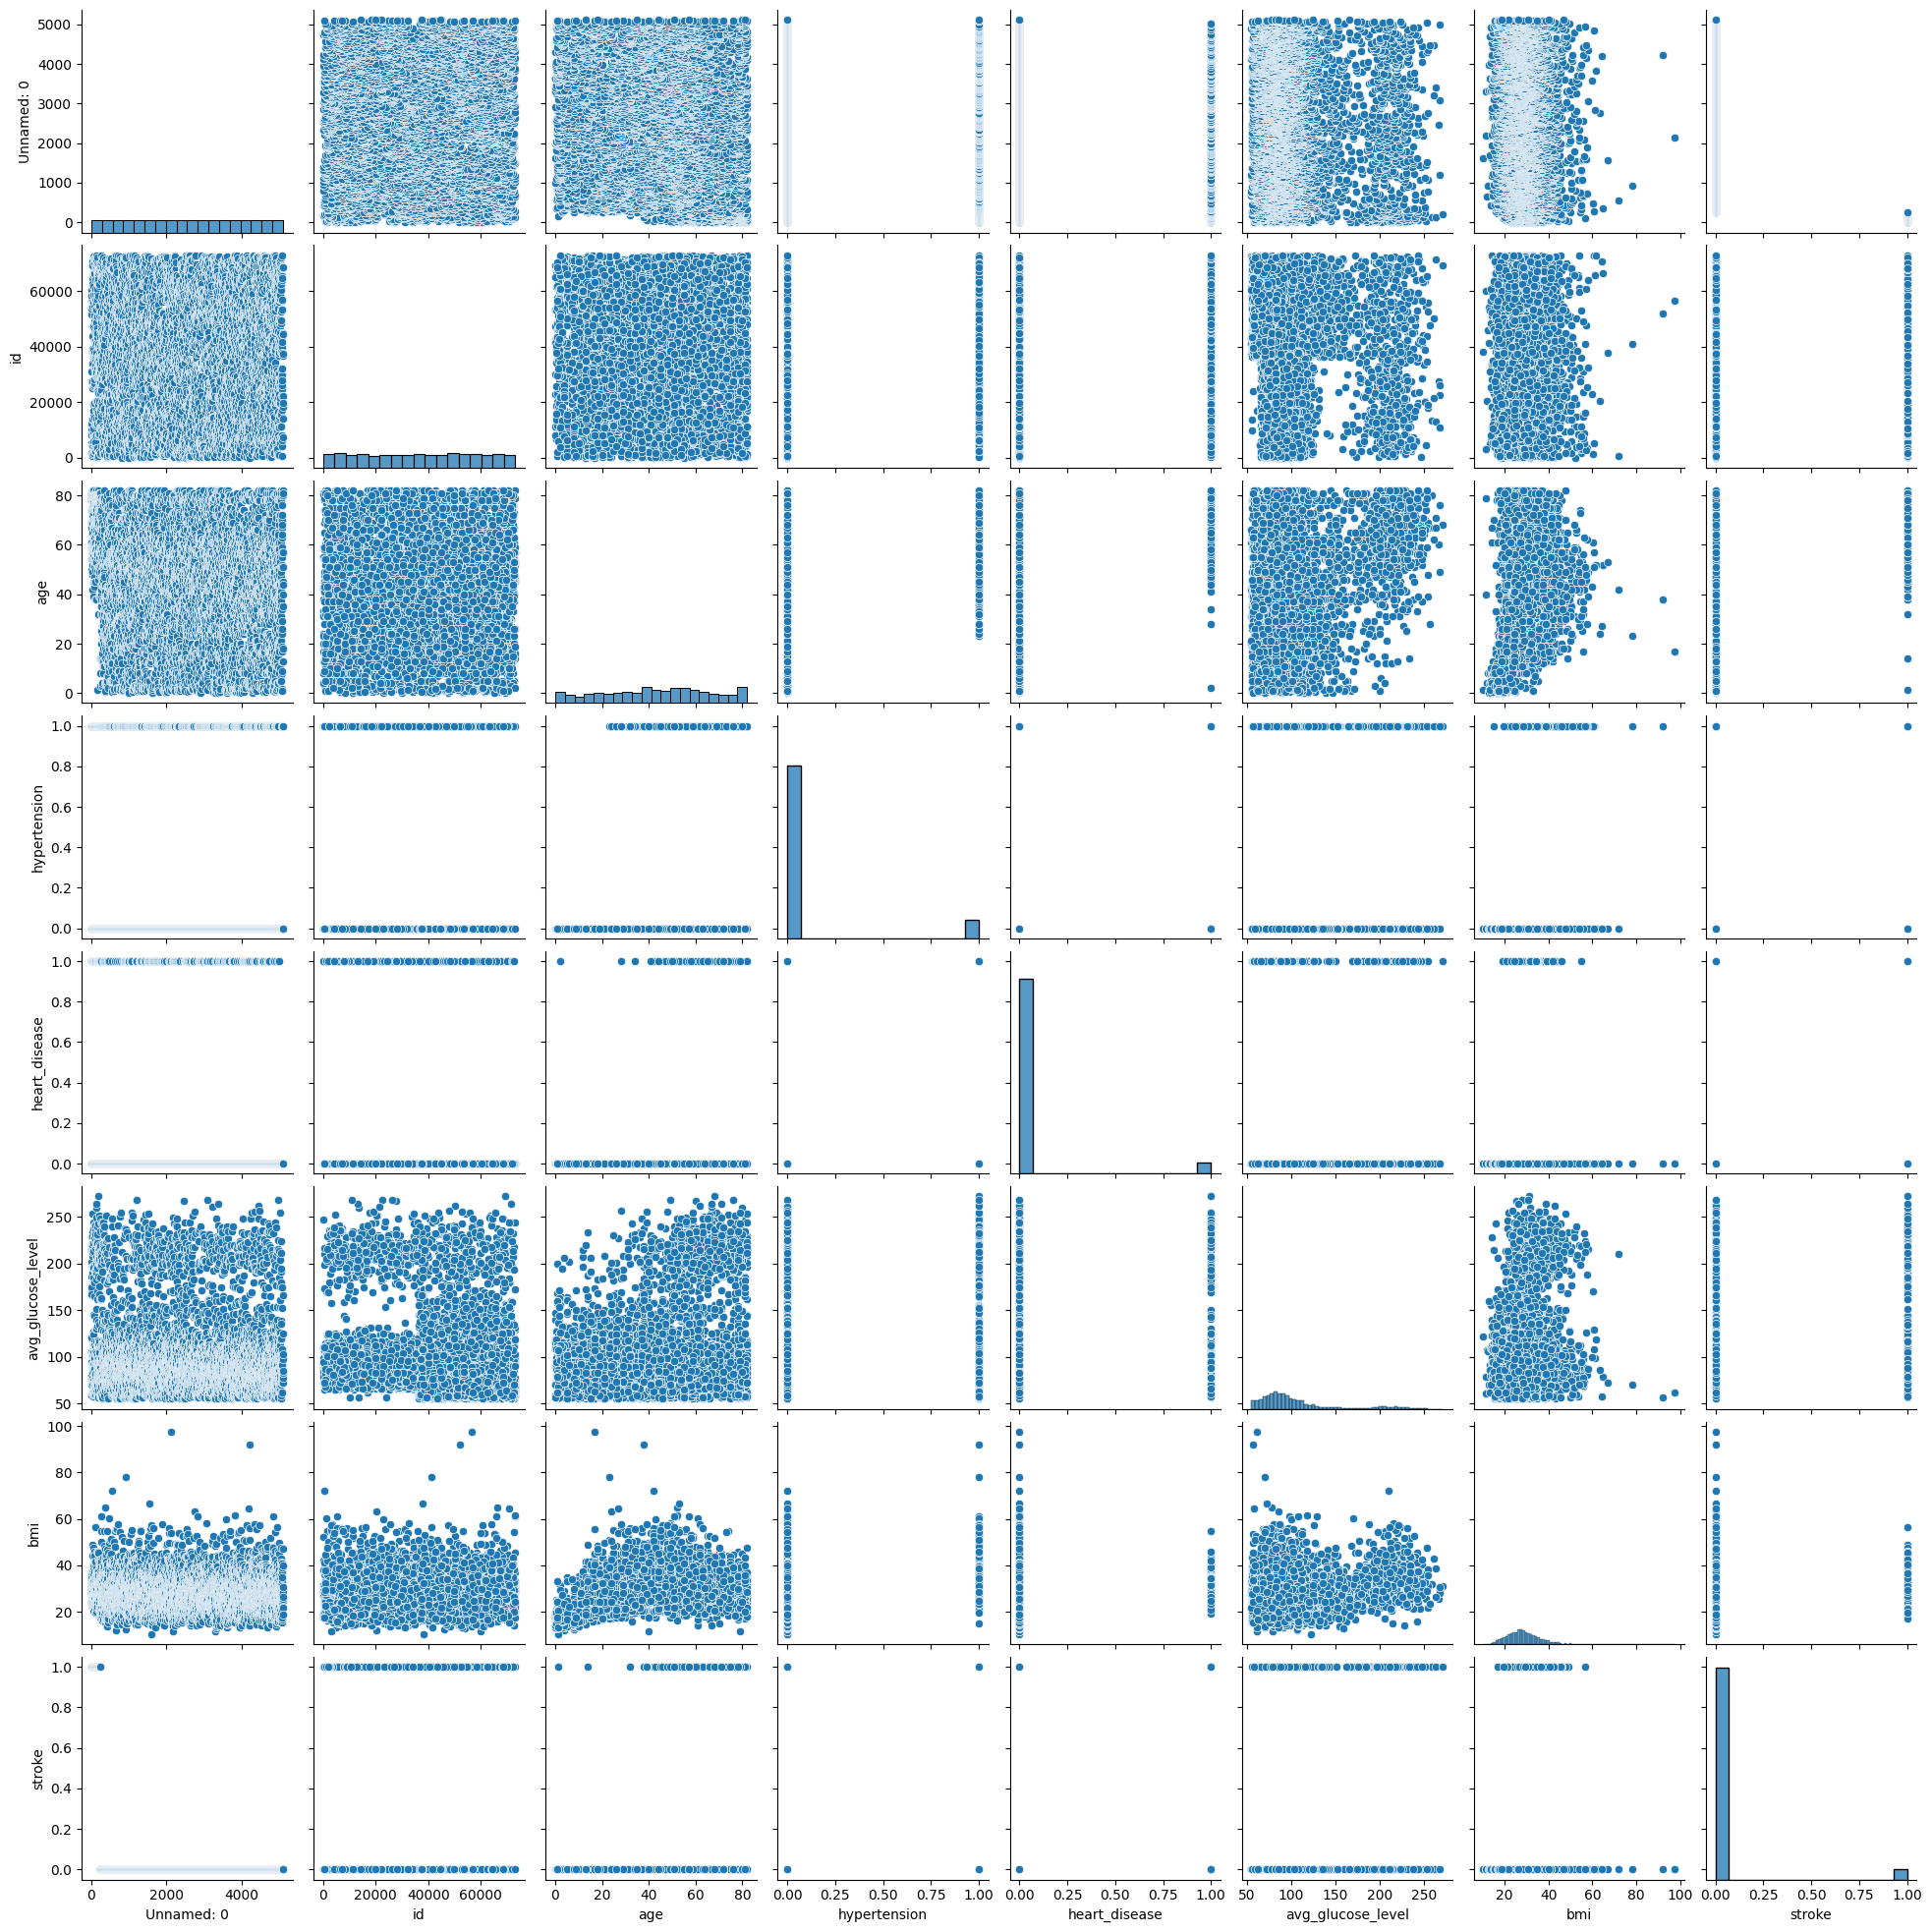

In [219]:
sns.pairplot(df)

In [220]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [221]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [222]:
ordinal_encoder = OrdinalEncoder(
    categories="auto",
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)
df[["gender"]] = ordinal_encoder.fit_transform(df[["gender"]])
df["gender"].value_counts()

gender
0.0    2994
1.0    2115
2.0       1
Name: count, dtype: int64

In [223]:
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [224]:
ordinal_encoder = OrdinalEncoder(
    categories="auto",
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)
df[["ever_married"]] = ordinal_encoder.fit_transform(df[["ever_married"]])

In [225]:
df["ever_married"].value_counts()

ever_married
1.0    3353
0.0    1757
Name: count, dtype: int64

In [226]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [227]:
df = pd.concat([df, pd.get_dummies(df["work_type"])], axis=1)
df.drop(columns=["work_type"], inplace=True)

In [228]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,1.0,67.0,NaN,NaN,1.0,Urban,228.69,36.6,NaN,1,False,False,True,False,False
1,0.0,61.0,0.0,0.0,1.0,Rural,202.21,NaN,never smoked,1,False,False,False,True,False
2,1.0,80.0,0.0,1.0,1.0,Rural,105.92,32.5,never smoked,1,False,False,True,False,False
3,0.0,49.0,0.0,0.0,1.0,Urban,171.23,34.4,smokes,1,False,False,True,False,False
4,0.0,79.0,1.0,0.0,1.0,Rural,174.12,24.0,never smoked,1,False,False,False,True,False


In [229]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [230]:
df = pd.concat([df, pd.get_dummies(df["Residence_type"])], axis=1)
df.drop(columns=["Residence_type"], inplace=True)

In [231]:
ordinal_encoder = OrdinalEncoder(
    categories="auto",
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)
df[["smoking_status"]] = ordinal_encoder.fit_transform(df[["smoking_status"]])
df["smoking_status"].value_counts()
# ne gi enkodirat i nan 

smoking_status
2.0    1708
0.0    1377
1.0     802
3.0     712
Name: count, dtype: int64

In [232]:
knn_imputer = KNNImputer(n_neighbors=21) # koren od 511 (nan vo smoking_status)
df['smoking_status'] = knn_imputer.fit_transform(df[['smoking_status']])

In [233]:
df.isna().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
children               0
Rural                  0
Urban                  0
dtype: int64

In [234]:
df["hypertension"].value_counts()

hypertension
0.0    3951
1.0     429
Name: count, dtype: int64

array([[<Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'heart_disease'}>, <Axes: >]],
      dtype=object)

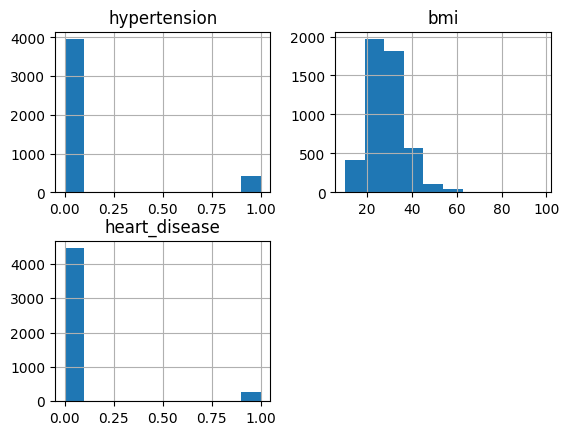

In [235]:
df[["hypertension", 'bmi', 'heart_disease']].hist()

In [236]:
knn_imputer = KNNImputer(n_neighbors=27) # koren od 730 (nan vo hypertension)
df['hypertension'] = knn_imputer.fit_transform(df[['hypertension']])

In [237]:
knn_imputer = KNNImputer(n_neighbors=19) # koren od 394 (nan vo heart_disease)
df['heart_disease'] = knn_imputer.fit_transform(df[['heart_disease']])

In [238]:
median_imputer = SimpleImputer(strategy="median")
df[['bmi']] = median_imputer.fit_transform(df[['bmi']])

In [239]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
dtype: int64

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   float64
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   float64
 8   stroke             5110 non-null   int64  
 9   Govt_job           5110 non-null   bool   
 10  Never_worked       5110 non-null   bool   
 11  Private            5110 non-null   bool   
 12  Self-employed      5110 non-null   bool   
 13  children           5110 non-null   bool   
 14  Rural              5110 non-null   bool   
 15  Urban              5110 non-null   bool   
dtypes: bool(7), float64(8), 

<Axes: >

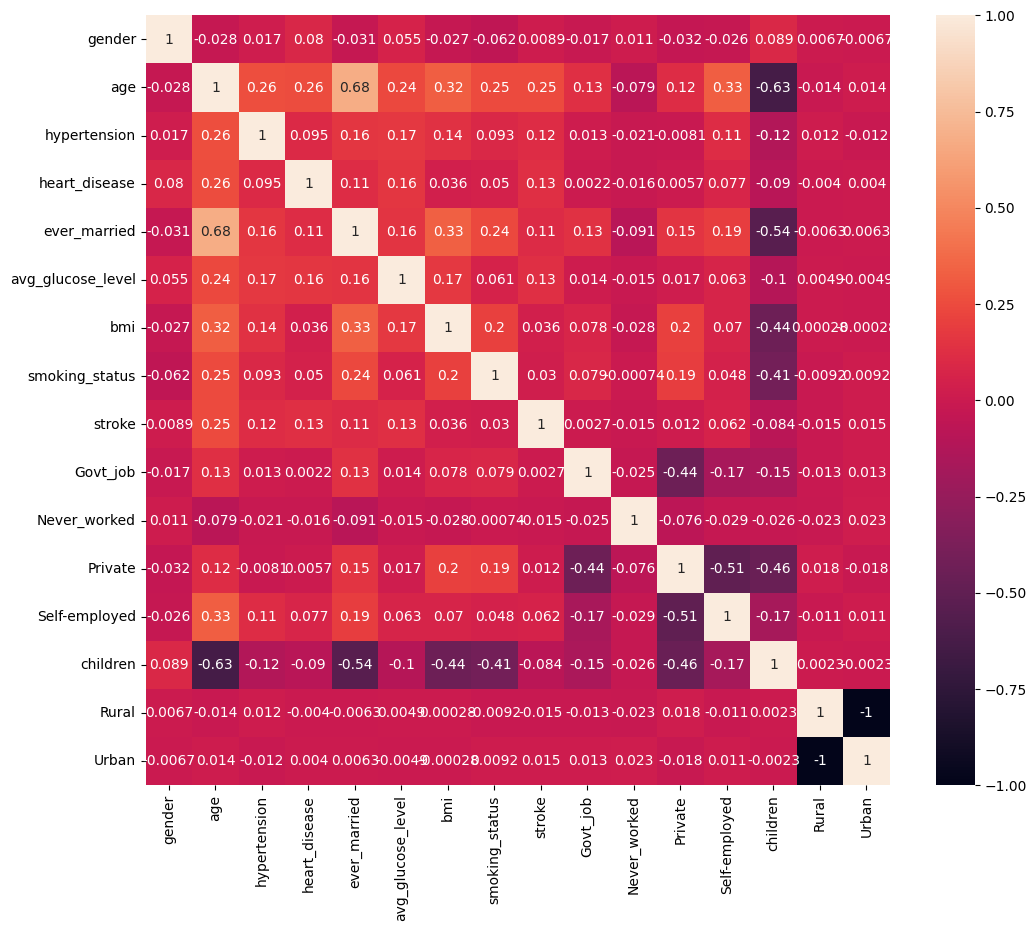

In [241]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [242]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [243]:
X, y = df.drop(columns=["stroke"]), df["stroke"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

classifier = LogisticRegression().fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9559686888454012
[[977   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



C:\Users\anama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\anama\AppData\Local

In [244]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

C:\Users\anama\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [21:22:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9412915851272016
[[957  20]
 [ 40   5]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       977
           1       0.20      0.11      0.14        45

    accuracy                           0.94      1022
   macro avg       0.58      0.55      0.56      1022
weighted avg       0.93      0.94      0.93      1022



In [245]:
df['stroke'].value_counts()
# nebalansirano

stroke
0    4861
1     249
Name: count, dtype: int64

In [246]:
data_stroke = df.loc[df['stroke'] == 1]
data_no_stroke = df.loc[df['stroke'] == 0]
data_no_stroke = data_no_stroke.sample(300)
new_data = pd.concat([data_no_stroke, data_stroke])
new_data = new_data.sample(frac=1)
new_data

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
4881,0.0,80.0,0.000000,0.000000,0.0,72.71,29.9,2.000000,0,False,False,False,True,False,False,True
3336,0.0,50.0,0.000000,0.000000,1.0,87.15,32.1,2.000000,0,False,False,False,True,False,True,False
3090,0.0,50.0,0.000000,0.000000,1.0,120.05,27.4,1.381605,0,True,False,False,False,False,True,False
3220,0.0,64.0,0.097945,0.000000,1.0,93.78,24.4,1.381605,0,False,False,False,True,False,False,True
143,0.0,69.0,1.000000,0.054283,0.0,72.17,36.8,2.000000,1,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0.0,16.0,0.000000,0.000000,0.0,89.45,28.1,0.000000,0,False,False,True,False,False,False,True
88,1.0,47.0,0.000000,0.000000,1.0,86.94,41.1,1.000000,1,False,False,True,False,False,False,True
5055,0.0,25.0,0.000000,0.000000,0.0,92.06,25.3,3.000000,0,False,False,True,False,False,False,True
659,1.0,78.0,0.000000,0.000000,1.0,55.32,29.6,3.000000,0,False,False,False,True,False,False,True


In [250]:
X = new_data.drop(columns=['stroke'])
y = new_data['stroke']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.7454545454545455
[[45 18]
 [10 37]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        63
           1       0.67      0.79      0.73        47

    accuracy                           0.75       110
   macro avg       0.75      0.75      0.74       110
weighted avg       0.76      0.75      0.75       110



C:\Users\anama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
model = XGBClassifier(max_depth=7, min_child_weight=1, n_estimators=50, n_jobs=-1, learning_rate=0.01)
model.fit(X_train, Y_train)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9412915851272016
[[957  20]
 [ 40   5]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       977
           1       0.20      0.11      0.14        45

    accuracy                           0.94      1022
   macro avg       0.58      0.55      0.56      1022
weighted avg       0.93      0.94      0.93      1022

